### Exploratory & Analysis Data Olist E-commerce

In [1]:
# import libraries yang digunakan

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('mode.chained_assignment', None)
#untuk menghilangkan warning atau notifikasi ketika eksekusi code

In [2]:
# Membuat koneksi pada database

def get_result(query):
    conn = sqlite3.connect("olist.db")
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    conn.close()

    return data

def create_df(data, columns):
    processData = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)

    # Reset kolom index
    processData = processData.reset_index(drop=True)

    # Join multi-idnex menjadi satu kolom index
    processData.columns = [' '.join(col).strip() for col in processData.columns.values]

    return processData

In [3]:
# Melihat list tabel pada database

conn = sqlite3.connect("olist.db")
cur = conn.cursor()

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
table_list

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

In [4]:
# Load Tabel Dataset

olistCustomer = create_df(get_result("Select * from olist_order_customer_dataset"), [["index","customer_id","customers_uniq_id","customers_zip_code_prefix","customer_city","customer_state"]])
olistGeolocation = create_df(get_result("Select * from olist_geolocation_dataset"), [["index","geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"]])
olistOrderItems = create_df(get_result("Select * from olist_order_items_dataset"), [["index","order_id","order_item_id","product_id", "seller_id","shipping_limit_date","price","freight_value"]])
olistOrderPayments = create_df(get_result("Select * from olist_order_payments_dataset"), [["index","order_id","payment_sequential","payment_type","payment_installments","payment_value"]])
olistOrderReviews = create_df(get_result("Select * from olist_order_reviews_dataset"), [["index","review_id","order_id","review_score","review_comment_title","review_comment_message","review_reaction_date","review_answer_timestamp"]])
olistOrders = create_df(get_result("Select * From olist_order_dataset"), [["index", "order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]])
olistProducts = create_df(get_result("Select * from olist_products_dataset"),[["index","product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"]])
olistSeller = create_df(get_result("Select * From olist_sellers_dataset"),[["index", "seller_id","seller_zip_code_prefix","seller_city","seller_state"]])
olistProductCategory = create_df(get_result("Select * From product_category_name_translation"),[["index","product_category_name", "product_category_name_english"]])


C:\Users\Admin\AppData\Local\Temp\ipykernel_14964\1388416786.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  processData = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14964\1388416786.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  processData = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14964\1388416786.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  processData = pd.DataFrame(data=data, columns=columns).drop("index", axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14964\1388416786.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  processData = pd.DataFrame(data=data, columns=col

### Objective



1. Kategori produk yang banyak dipesan di Olist
2. Tren penjualan 10 kategori produk yang banyak dipesan di Olist selama 2016–2018
3. Persebaran pengguna Olist berdasarkan kota

### Read Data
Pada proses ini, kita akan menyiapkan data-data yang akan digunakan untuk menyelesaikan objective. Tabel tersebut adalah tabel olist_order_customer_dataset, olist_products_dataset, olist_order_items_dataset, olist_order_dataset, product_category_name_translation, dan olist_geolocation_dataset.


In [5]:
# Membuka tabel olist_order_customer_dataset atau olistCustomer
olistCustomer

,customer_id,customers_uniq_id,customers_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
# Membuka tabel product_category_name_translation atau tabel olistProductCategory
olistProductCategory.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
# Membuka tabel olist_products_dataset dan menggabungkannya dengan tabel product_category_name_translation
join_product = """ select product_id, 
                          product_category_name,
                          product_category_name_english
                    from olist_products_dataset
                    left join product_category_name_translation
                    using (product_category_name)
               """

join_product = pd.read_sql(join_product, conn)
join_product

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [8]:
# Membuka tabel olist_order_items_dataset
order_item = """
                 Select order_id, 
                        product_id,
                        seller_id
                 from olist_order_items_dataset
              """

order_item=pd.read_sql(order_item, conn)
order_item

,order_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [9]:
# Membuka tabel product_category_name_translation
olistProductCategory.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# Membuka dan menggabungkan tabel olist_order_dataset dengan tabel olist_order_customer_dataset

orders_product = """ select order_id,
                            customer_id,
                            order_purchase_timestamp
                     from olist_order_dataset
                     left join olist_order_customer_dataset
                     using (customer_id)
            
                 """

orders_product = pd.read_sql(orders_product, conn)
orders_product

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


In [11]:
# Menggabungkan tabel order_item, dan product.
product_merge = pd.merge(join_product, order_item, on='product_id', how='left').merge(orders_product, on='order_id', how='left')
product_merge

,product_id,product_category_name,product_category_name_english,order_id,seller_id,customer_id,order_purchase_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,f8a3e963a310aa58b60a5b1fed5bceb5,2018-04-24 16:16:53
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,5236307716393b7114b53ee991f36956,b561927807645834b59ef0d16ba55a24,03fc97548af8f58fefc768d12b546c9c,2018-01-31 18:55:36
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,7b07b3c7487f0ea825fc6df75abd658b,e41819d1c95c12c9ce495b630eab8aee,2018-07-09 21:18:01
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,c510bc1718f0f2961eaa42a23330681a,322162b5ca010c2b059cb5224dd818b1,2018-08-03 08:55:50
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,0be8ff43f22e456b4e0371b2245e4d01,c11c31965ff02cc1d7132df8edfcbc22,2018-04-11 01:06:37
...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,4324dd16853115efb0fd9d0d131ba6f4,e750210dde7e68dbd5194c0809e97f7e,2018-01-03 15:05:53
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4,0f139d1b208a62a37671423e5eff5016,2018-03-06 11:51:44
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4,0f139d1b208a62a37671423e5eff5016,2018-03-06 11:51:44
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4,0f139d1b208a62a37671423e5eff5016,2018-03-06 11:51:44


In [12]:
# Mengecek informasi pada tabel yang akan digunakan
product_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product_id                     112650 non-null  object
 1   product_category_name          111047 non-null  object
 2   product_category_name_english  111023 non-null  object
 3   order_id                       112650 non-null  object
 4   seller_id                      112650 non-null  object
 5   customer_id                    112650 non-null  object
 6   order_purchase_timestamp       112650 non-null  object
dtypes: object(7)
memory usage: 6.0+ MB


Tabel yang digunakan memiliki 112650 baris. Beberapa kolom memiliki nilai kosong dan tipe data yang kurang sesuai.


### Data Cleaning

In [13]:
# Handling Missing/NaN value
product_merge.isna()

,product_id,product_category_name,product_category_name_english,order_id,seller_id,customer_id,order_purchase_timestamp
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
112645,False,False,False,False,False,False,False
112646,False,False,False,False,False,False,False
112647,False,False,False,False,False,False,False
112648,False,False,False,False,False,False,False


In [14]:
# Mengecek jumlah Handling Missing/NaN value

product_merge.isna().sum()

product_id                          0
product_category_name            1603
product_category_name_english    1627
order_id                            0
seller_id                           0
customer_id                         0
order_purchase_timestamp            0
dtype: int64

In [15]:
# Handling Missing atau NaN Value
product_merge[product_merge['product_category_name_english'].isna()]

,product_id,product_category_name,product_category_name_english,order_id,seller_id,customer_id,order_purchase_timestamp
273,a41e356c76fab66334f36de622ecbd3a,None,None,b8bfa12431142333a0c84802f9529d87,d9cb0052a666de5308b32f32ad5f1b1c,c81be24f970cdf800017108e48d4b098,2018-01-19 00:21:43
338,d8dee61c2034d6d075997acef1870e9b,None,None,9d7f2c9f33008498700ffdc3162878fb,c826c40d7b19f62a09e2d7c5e7295ee2,4d54bd3326ad77cbe4e1bd929a209106,2017-08-27 13:02:01
364,56139431d72cd51f19eb9f7dae4d1617,None,None,36750bfd3e70a5f8f95edf2e28f1d60e,b0f2a6122a90a93eb03e68653dd960e3,352960fe6741c7944bd2007d8d1d3f64,2018-06-22 21:30:06
387,46b48281eb6d663ced748f324108c733,None,None,3495e966748a04cd5d7f4537a57fa3ef,dd7ddc04e1b6c2c614352b383efe2d36,227d70f3020b7eda1573401a7d5e1aff,2017-09-04 22:02:17
388,46b48281eb6d663ced748f324108c733,None,None,5dc05f32211efb743fde17f226adfb6b,dd7ddc04e1b6c2c614352b383efe2d36,d0a06220865cc230d39188471bffd4f6,2017-08-11 16:25:03
...,...,...,...,...,...,...,...
111596,10dbe0fbaa2c505123c17fdc34a63c56,None,None,a908872306574c9405b29a838aee5521,0c8380b62e38e8a1e6adbeba7eb9688c,66248865be7641119877386694de1598,2018-07-24 17:04:52
111633,bd2ada37b58ae94cc838b9c0569fecd8,None,None,b9138517d788504f3732765e32ffc3d7,e5d4b2b0c3bca22085f7a19a28de0c42,5288e45224162bdb75c2c4147aac76bb,2017-11-26 05:27:45
112027,fa51e914046aab32764c41356b9d4ea4,None,None,5a06ec99090e75d00d2b33b0efdce2f4,1b8b75e227c9a9c100d0c210fb6176ce,4275510de6637b903e69994771170784,2017-02-01 21:33:14
112028,fa51e914046aab32764c41356b9d4ea4,None,None,fe51db9ff7a67edc7468c14e0a2e9aa1,1b8b75e227c9a9c100d0c210fb6176ce,7247106f634d1730b57da177148bbc0f,2017-02-06 17:10:51


In [16]:
# Mengecek Kolom yang memiliki nilai NaN
column_NaN = product_merge.columns[product_merge.isna().any()].tolist()
column_NaN

['product_category_name', 'product_category_name_english']

In [17]:
# Mengecek jumlah Handling Missing/NaN value

cek_category_name = product_merge[product_merge.product_category_name.isna()]
print(f"{len(cek_category_name.product_id)} rows doesn't have category name")

1603 rows doesn't have category name


Pada kolom product_category_name terdapat nilai NaN atau missing values sebanyak 1603 baris. Kemungkinan data ini telah dihapus dari database atau mengalami kerusakan. Oleh sebab itu, data sebanyak 1603 baris akan dihapus.

In [18]:
# Menghapus data kosong
product_merge = product_merge.dropna(subset=['product_category_name'])

product_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111047 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product_id                     111047 non-null  object
 1   product_category_name          111047 non-null  object
 2   product_category_name_english  111023 non-null  object
 3   order_id                       111047 non-null  object
 4   seller_id                      111047 non-null  object
 5   customer_id                    111047 non-null  object
 6   order_purchase_timestamp       111047 non-null  object
dtypes: object(7)
memory usage: 6.8+ MB


In [19]:
# Handling Missing atau NaN Value pada kolom product_category_name_english

product_merge[product_merge['product_category_name_english'].isna()]

,product_id,product_category_name,product_category_name_english,order_id,seller_id,customer_id,order_purchase_timestamp
5365,0105b5323d24fc655f73052694dbbb3a,pc_gamer,None,4821d5af4c2ac98b0f70e47c5d845520,2138ccb85b11a4ec1e37afbd1c8eda1f,ae1f2f01f136f0172bbceffa5d31613c,2017-04-24 19:57:30
5366,0105b5323d24fc655f73052694dbbb3a,pc_gamer,None,804e5ddab73def7d5e86b8ae6f27e83b,2138ccb85b11a4ec1e37afbd1c8eda1f,ae9d8bf13681f31ec761764094e6ab95,2017-06-15 14:51:11
5367,0105b5323d24fc655f73052694dbbb3a,pc_gamer,None,94f94ebc2e26aeea2aa9e8945cb9fb0c,2138ccb85b11a4ec1e37afbd1c8eda1f,e00a5ec8d72cb3c5ed58f50fb1a55cbf,2017-04-17 14:31:24
5368,0105b5323d24fc655f73052694dbbb3a,pc_gamer,None,d7ae3c10c3a4c7a721e64ba401ee745b,2138ccb85b11a4ec1e37afbd1c8eda1f,8622c629a0890a4ca20d1e7016e1a613,2018-02-20 14:59:40
5369,0105b5323d24fc655f73052694dbbb3a,pc_gamer,None,e4aac63ea6f6b75b6d91ead05207fb43,2138ccb85b11a4ec1e37afbd1c8eda1f,9aa2c4bac83761140a8703ebdf9e49bd,2017-05-25 12:51:37
20076,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,None,d94600e5b855ffe8db3b9bc06e21b1bd,ed8cb7b190ceb6067227478e48cf8dde,9f35486803ac72d115dedc28ef6156e1,2018-07-27 14:33:28
20077,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,None,d94600e5b855ffe8db3b9bc06e21b1bd,ed8cb7b190ceb6067227478e48cf8dde,9f35486803ac72d115dedc28ef6156e1,2018-07-27 14:33:28
25144,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,None,b1829b9fc61d2f28d8668cd5bde29e3f,ed8cb7b190ceb6067227478e48cf8dde,bd371cfbb78aa6bd8d2ad4dc52565d8f,2018-07-20 01:38:27
25616,6727051471a0fc4a0e7737b57bff2549,pc_gamer,None,1d7542bb5262913fe0516f7943b69a58,1961c3e1272bfeceb05d0b78b5bbfdaf,a7bf5e6fa311950360efc620e590fa74,2018-07-28 23:32:46
25617,6727051471a0fc4a0e7737b57bff2549,pc_gamer,None,1d7542bb5262913fe0516f7943b69a58,1961c3e1272bfeceb05d0b78b5bbfdaf,a7bf5e6fa311950360efc620e590fa74,2018-07-28 23:32:46


Terdapat 111047 entries setelah dilakukan penghapusan data NaN Values di kolom product_category_name. Namun, pada kolom product_category_name_english juga terdapat NaN Value.

Setelah dilihat, data NaN Values di kolom product_category_name_english berasal dari data pada kolom product_category_name yang tidak diterjemahkan, yaitu "portateis_cozinha_e_preparadores_de_alimentos" dan "pc_gamer". Maka NaN values akan diisi dengan terjemahan dari kedua kategori tersebut, yaitu "kitchen_and_foot_preparators_portables" dan "pc_gamer"

In [20]:
# Mengganti NaN Values pada kolom product_category_name_english

ganti_value = {
    'portateis_cozinha_e_preparadores_de_alimentos' : 'kitchen_and_foot_preparators_portables',
    'pc_gamer' : 'pc_gamer'
}

product_merge['product_category_name_english'].fillna(product_merge['product_category_name'].map(ganti_value), inplace=True)
product_merge.info()


<class 'pandas.core.frame.DataFrame'>
Index: 111047 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product_id                     111047 non-null  object
 1   product_category_name          111047 non-null  object
 2   product_category_name_english  111047 non-null  object
 3   order_id                       111047 non-null  object
 4   seller_id                      111047 non-null  object
 5   customer_id                    111047 non-null  object
 6   order_purchase_timestamp       111047 non-null  object
dtypes: object(7)
memory usage: 6.8+ MB


In [21]:
# Menghapus kolom product_category_name karena tidak digunakan.
product_merge.drop('product_category_name', axis=1, inplace=True)
product_merge.head()

,product_id,product_category_name_english,order_id,seller_id,customer_id,order_purchase_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,f8a3e963a310aa58b60a5b1fed5bceb5,2018-04-24 16:16:53
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,b561927807645834b59ef0d16ba55a24,03fc97548af8f58fefc768d12b546c9c,2018-01-31 18:55:36
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,7b07b3c7487f0ea825fc6df75abd658b,e41819d1c95c12c9ce495b630eab8aee,2018-07-09 21:18:01
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,c510bc1718f0f2961eaa42a23330681a,322162b5ca010c2b059cb5224dd818b1,2018-08-03 08:55:50
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,0be8ff43f22e456b4e0371b2245e4d01,c11c31965ff02cc1d7132df8edfcbc22,2018-04-11 01:06:37


Kolom product_category_name dihapus karena kolom tersebut tidak digunakan. Proses selanjutnya akan menggunakan kolom product_category_name_english.

In [22]:
# Handling Duplicated Data
product_merge.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
112645     True
112646     True
112647     True
112648     True
112649    False
Length: 111047, dtype: bool

In [23]:
# Mengecek Duplicated Data
product_merge[product_merge.duplicated()]

,product_id,product_category_name_english,order_id,seller_id,customer_id,order_purchase_timestamp
9,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,6ecf7023e8dd4ec8b08746c35b9fcb60,95f83f51203c626648c875dd41874c7f,181e2217f874cb5390be37f378db5e07,2017-11-24 14:22:48
11,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,8ac5b235603eee2e21e36261b2df536c,95f83f51203c626648c875dd41874c7f,2ea5983ec2edde5dcba726ea64e9fadb,2017-11-27 11:26:14
13,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,c5874d438cf199ea7c0f27967f6cf462,95f83f51203c626648c875dd41874c7f,014fb09b34197c57ae3c77a43d18475e,2017-11-26 14:41:13
14,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,c5874d438cf199ea7c0f27967f6cf462,95f83f51203c626648c875dd41874c7f,014fb09b34197c57ae3c77a43d18475e,2017-11-26 14:41:13
15,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,c5874d438cf199ea7c0f27967f6cf462,95f83f51203c626648c875dd41874c7f,014fb09b34197c57ae3c77a43d18475e,2017-11-26 14:41:13
...,...,...,...,...,...,...
112597,c4e71b64511b959455e2107fe7859020,housewares,cba21bedbcfe88bcc7e6918e9555355c,aced59e9b31ef866a94f9e7f29d8d418,24c7b4e5422cb09dd297eb1b3fc7565e,2017-11-30 15:43:15
112643,83808703fc0706a22e264b9d75f04a2e,computers_accessories,420937423f0cb3d3fe689330b5d385a9,4324dd16853115efb0fd9d0d131ba6f4,c17ef88b39d731163898d59a3a9b6e47,2017-10-19 09:26:47
112645,83808703fc0706a22e264b9d75f04a2e,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,4324dd16853115efb0fd9d0d131ba6f4,e750210dde7e68dbd5194c0809e97f7e,2018-01-03 15:05:53
112647,83808703fc0706a22e264b9d75f04a2e,computers_accessories,6e4465d771f02e4fe335225de3c6c043,4324dd16853115efb0fd9d0d131ba6f4,0f139d1b208a62a37671423e5eff5016,2018-03-06 11:51:44


Terdapat 10082 baris yang duplicated data. Namun, tidak dapat menghapus data duplikat. Hal ini dikarenakan dalam order_id,
seorang customer dapat membeli barang yang sama dengan jumlah lebih dari satu barang.

In [24]:
product_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111047 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   product_id                     111047 non-null  object
 1   product_category_name_english  111047 non-null  object
 2   order_id                       111047 non-null  object
 3   seller_id                      111047 non-null  object
 4   customer_id                    111047 non-null  object
 5   order_purchase_timestamp       111047 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


### 1. Kategori produk yang banyak dipesan di Olist.

In [25]:
group_product = product_merge.groupby(['product_category_name_english'])['order_id'].count().reset_index()
group_product_filter = group_product.sort_values('order_id', ascending=False).head(10)
group_product_filter.head(10)

,product_category_name_english,order_id
7,bed_bath_table,11115
43,health_beauty,9670
67,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
72,watches_gifts,5991
70,telephony,4545
42,garden_tools,4347
5,auto,4235


In [26]:
# Menghilangkan "_" pada penulisan kategori produk

group_product_filter.product_category_name_english = group_product_filter.product_category_name_english.str.replace("_"," ")
group_product_filter.product_category_name_english


7            bed bath table
43            health beauty
67           sports leisure
39          furniture decor
15    computers accessories
49               housewares
72            watches gifts
70                telephony
42             garden tools
5                      auto
Name: product_category_name_english, dtype: object

[Text(0, 0.5, 'Kategori Produk')]

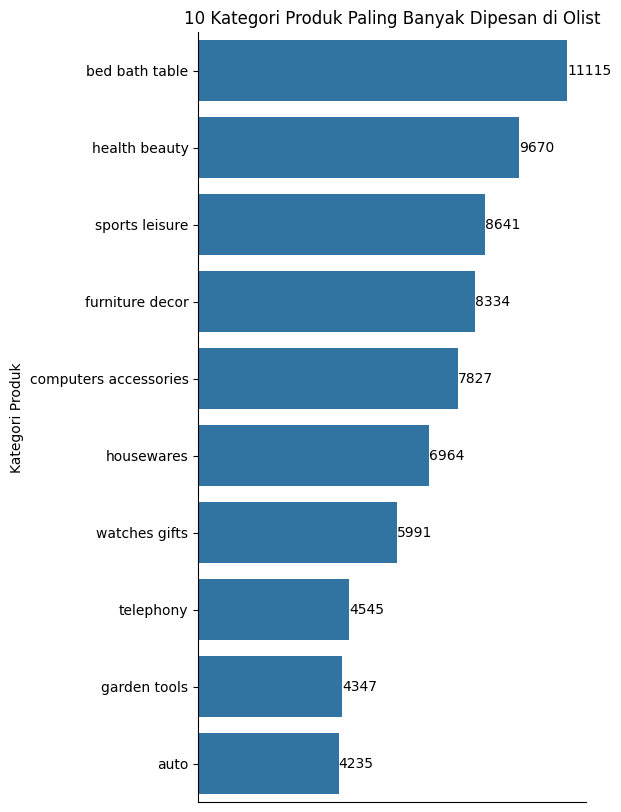

In [27]:
# Menampilkan 10 Kategori Produk Paling Banyak Dipesan di Olist

fig, ax = plt.subplots(figsize=(5, 10))

ax = sns.barplot(data=group_product_filter.head(10), y='product_category_name_english', x='order_id',
                 orient='h',
                 order=group_product_filter.sort_values('order_id', ascending=False).product_category_name_english
                 )

for i in ax.containers:
    ax.bar_label(i,)

sns.despine()
ax.set(title='10 Kategori Produk Paling Banyak Dipesan di Olist')
ax.set(xlabel=None)
ax.set(xticks=[])
ax.set(ylabel='Kategori Produk')

### 2. Tren Pembelian Pada Tahun 2016-2018 di Olist

In [28]:
# Mengubah format data pada kolom order_purchase_timestamp menjadi format datetime 
product_merge.order_purchase_timestamp = pd.to_datetime(product_merge.order_purchase_timestamp, yearfirst=True)
product_merge.dtypes


product_id                               object
product_category_name_english            object
order_id                                 object
seller_id                                object
customer_id                              object
order_purchase_timestamp         datetime64[ns]
dtype: object

In [29]:
# Menampilkan kategori produk di Olist
group_product_filter.head(10)

,product_category_name_english,order_id
7,bed bath table,11115
43,health beauty,9670
67,sports leisure,8641
39,furniture decor,8334
15,computers accessories,7827
49,housewares,6964
72,watches gifts,5991
70,telephony,4545
42,garden tools,4347
5,auto,4235


In [30]:
# Menghitung jumlah penjualan kategori produk bed_bath_table
# Melakukan parsing date pada kolom order_purchase_timestamp
table_bed_bath_order = product_merge[product_merge.product_category_name_english == 'bed_bath_table']
table_bed_bath_order['order_purchase_timestamp_year'] = table_bed_bath_order['order_purchase_timestamp'].dt.year
table_bed_bath_order


group_bed_bath = table_bed_bath_order.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_bed_bath

,order_purchase_timestamp_year,order_id
0,2016,8
1,2017,5223
2,2018,5884


In [31]:
# Menghitung jumlah penjualan kategori produk health_beauty
# Melakukan parsing date pada kolom order_purchase_timestamp

table_health_beauty = product_merge[product_merge.product_category_name_english == 'health_beauty']
table_health_beauty['order_purchase_timestamp_year'] = table_health_beauty['order_purchase_timestamp'].dt.year
table_health_beauty

group_health_beauty = table_health_beauty.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_health_beauty

,order_purchase_timestamp_year,order_id
0,2016,51
1,2017,3668
2,2018,5951


In [32]:
# Menghitung jumlah penjualan kategori produk sport leisure
# Melakukan parsing date pada kolom order_purchase_timestamp

table_sports_leisure = product_merge[product_merge.product_category_name_english == "sports_leisure"]
table_sports_leisure['order_purchase_timestamp_year'] = table_sports_leisure['order_purchase_timestamp'].dt.year
table_sports_leisure

group_sports_leisure = table_sports_leisure.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_sports_leisure

,order_purchase_timestamp_year,order_id
0,2016,19
1,2017,4095
2,2018,4527


In [33]:
# Menghitung jumlah penjualan furniture_decor
# Melakukan parsing date pada kolom order_purchase_timestamp

table_furniture_decor = product_merge[product_merge.product_category_name_english == "furniture_decor"]
table_furniture_decor['order_purchase_timestamp_year'] = table_furniture_decor['order_purchase_timestamp'].dt.year
table_furniture_decor

group_furniture_decor = table_furniture_decor.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_furniture_decor

,order_purchase_timestamp_year,order_id
0,2016,69
1,2017,4147
2,2018,4118


In [34]:
# Menghitung jumlah penjualan computer_accessories
# Melakukan parsing date pada kolom order_purchase_timestamp

table_computer_access = product_merge[product_merge.product_category_name_english == "computers_accessories"]
table_computer_access['order_purchase_timestamp_year'] = table_computer_access['order_purchase_timestamp'].dt.year
table_computer_access

group_computer_access = table_computer_access.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_computer_access

,order_purchase_timestamp_year,order_id
0,2016,21
1,2017,3098
2,2018,4708


In [35]:
# Menghitung jumlah penjualan Housewares
# Melakukan parsing date pada kolom order_purchase_timestamp

table_housewares = product_merge[product_merge.product_category_name_english == "housewares"]
table_housewares['order_purchase_timestamp_year'] = table_housewares['order_purchase_timestamp'].dt.year
table_housewares

group_housewares = table_housewares.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_housewares

,order_purchase_timestamp_year,order_id
0,2016,12
1,2017,2906
2,2018,4046


In [36]:
# Menghitung jumlah penjualan kategori produk watches_gift
# Melakukan parsing date pada kolom order_purchase_timestamp
table_watches_gifts = product_merge[product_merge.product_category_name_english == 'watches_gifts']
table_watches_gifts['order_purchase_timestamp_year'] = table_watches_gifts['order_purchase_timestamp'].dt.year
table_watches_gifts


group_watches_gifts = table_watches_gifts.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_watches_gifts

,order_purchase_timestamp_year,order_id
0,2016,5
1,2017,2283
2,2018,3703


In [37]:
# Menghitung jumlah penjualan kategori produk telephony
# Melakukan parsing date pada kolom order_purchase_timestamp
table_telephony = product_merge[product_merge.product_category_name_english == 'telephony']
table_telephony['order_purchase_timestamp_year'] = table_telephony['order_purchase_timestamp'].dt.year
table_telephony


group_telephony = table_telephony.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_telephony

,order_purchase_timestamp_year,order_id
0,2016,11
1,2017,2198
2,2018,2336


In [38]:
# Menghitung jumlah penjualan kategori garden_tools	
# Melakukan parsing date pada kolom order_purchase_timestamp
table_garden_tools = product_merge[product_merge.product_category_name_english == 'garden_tools']
table_garden_tools['order_purchase_timestamp_year'] = table_garden_tools['order_purchase_timestamp'].dt.year
table_garden_tools


group_garden_tools = table_garden_tools.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_garden_tools

,order_purchase_timestamp_year,order_id
0,2016,5
1,2017,2463
2,2018,1879


In [39]:
# Menghitung jumlah penjualan kategori auto
# Melakukan parsing date pada kolom order_purchase_timestamp
table_auto = product_merge[product_merge.product_category_name_english == 'auto']
table_auto['order_purchase_timestamp_year'] = table_auto['order_purchase_timestamp'].dt.year
table_auto


group_auto = table_auto.groupby('order_purchase_timestamp_year')['order_id'].count().reset_index()
group_auto

,order_purchase_timestamp_year,order_id
0,2016,12
1,2017,1604
2,2018,2619


#### Pivot

In [40]:
# Menampilkan data kategori produk dalam bentuk pivot

product_pivot = pd.DataFrame({"Product": ["Bed Bath Table","Bed Bath Table","Bed Bath Table",
                                          "Health Beauty","Health Beauty","Health Beauty",
                                          "Sports Leisure","Sports Leisure","Sports Leisure",
                                          "Furniture Decor","Furniture Decor","Furniture Decor",
                                          "Computers Accessories","Computers Accessories","Computers Accessories",
                                          "Housewares","Housewares","Housewares",
                                          "Watches Gift" , "Watches Gift" , "Watches Gift",
                                          "Telephony","Telephony","Telephony",
                                          "Garden Tools","Garden Tools","Garden Tools",
                                          "Auto","Auto","Auto"
                                          ],
                              "Tahun" : ["2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018",
                                         "2016","2017","2018"
                                         ],
                              "Jumlah" : [8, 5223, 5884,
                                          51, 3668, 5951,
                                          19, 4085, 4527,
                                          69, 4147, 4118,
                                          21, 3098, 4708,
                                          12, 2906, 4046,
                                          5, 2283, 3703,
                                          11, 2198, 2336,
                                          5, 2463, 1879,
                                          12, 1604, 2619
                                          ]
                            })

product_pivot

,Product,Tahun,Jumlah
0,Bed Bath Table,2016,8
1,Bed Bath Table,2017,5223
2,Bed Bath Table,2018,5884
3,Health Beauty,2016,51
4,Health Beauty,2017,3668
5,Health Beauty,2018,5951
6,Sports Leisure,2016,19
7,Sports Leisure,2017,4085
8,Sports Leisure,2018,4527
9,Furniture Decor,2016,69


In [41]:
#Menanmpilakn kategori produk dalam bentuk pivot

pd_pivot = product_pivot.pivot_table(values='Jumlah', index=['Product'], columns= ['Tahun'], aggfunc=sum, margins=True)
pd_pivot = pd_pivot.reset_index(drop= False)
pd_pivot = pd_pivot.sort_values('All', ascending=False)
pd_pivot


Tahun,Product,2016,2017,2018,All
10,All,213,31675,39771,71659
1,Bed Bath Table,8,5223,5884,11115
5,Health Beauty,51,3668,5951,9670
7,Sports Leisure,19,4085,4527,8631
3,Furniture Decor,69,4147,4118,8334
2,Computers Accessories,21,3098,4708,7827
6,Housewares,12,2906,4046,6964
9,Watches Gift,5,2283,3703,5991
8,Telephony,11,2198,2336,4545
4,Garden Tools,5,2463,1879,4347


In [42]:
# Menampilkan tren penjualan produk pada tahun 2016-2018

fig = px.line(product_pivot, x="Tahun", y="Jumlah", color="Product", title="Trend Penjualan Product Category (2016-2018)")
fig.show()

### 3. Mengetahui Jumlah dan Pesebaran Pengguna Olist

In [43]:
# Mengubah nama kolom customer_zip_code_prefix pada tabel olist_order_customer_dataset

olistCustomer.rename(columns={"customers_zip_code_prefix" : "zip_code"}, inplace= True)
olistCustomer


,customer_id,customers_uniq_id,zip_code,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [44]:
# Mengubah nama kolom geolocation_zip_code_prefix pada tabel olist_geolocation_dataset

olistGeolocation.rename(columns={"geolocation_zip_code_prefix" : "zip_code"}, inplace= True)
olistGeolocation


,zip_code,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


Mengubah nama kolom customer_zip_code_prefix pada tabel olist_order_customer_dataset dan kolom geolocation_zip_code_prefix pada tabel olist_geolocation_dataset menjadi "zip_code" untuk memudahkan dalam menggabungkan kedua tabel ini.

In [45]:
# Menggabungkan tabel  olist_order_customer_dataset (OlistCustomer) dan tabel olist_geolocation_dataset (OlistGeolocation) 

cust_merge=pd.merge(olistCustomer,olistGeolocation, on="zip_code")
cust_merge


,customer_id,customers_uniq_id,zip_code,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...
15083450,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
15083451,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.822945,-49.244615,aparecida de goiania,GO
15083453,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,-28.226596,-52.467505,passo fundo,RS


In [46]:
# Handling Missing Values/ NaN
cust_merge.isna().sum()

customer_id          0
customers_uniq_id    0
zip_code             0
customer_city        0
customer_state       0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64

In [47]:
# Handling Duplicated Data

cust_merge[cust_merge.duplicated(keep=False)]

,customer_id,customers_uniq_id,zip_code,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
5,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,franca,SP
8,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497904,-47.405578,franca,SP
9,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,franca,SP
20,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509692,-47.390810,franca,SP
...,...,...,...,...,...,...,...,...,...
15083450,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
15083451,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.822945,-49.244615,aparecida de goiania,GO
15083453,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,-28.226596,-52.467505,passo fundo,RS


In [48]:
#Menghapus data duplicated
cust_merge = cust_merge.drop_duplicates(keep= 'first')
cust_merge


,customer_id,customers_uniq_id,zip_code,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...
15083444,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823236,-49.247423,aparecida de goiania,GO
15083445,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823261,-49.247368,aparecida de goiânia,GO
15083446,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
15083449,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821692,-49.245116,aparecida de goiania,GO


In [49]:
# Handling duplicated data
cust_merge.duplicated(keep=False)

0           False
1           False
2           False
3           False
4           False
            ...  
15083444    False
15083445    False
15083446    False
15083449    False
15083453    False
Length: 10327728, dtype: bool

In [50]:
# Mengetahui nilai unik pada kolom geolocation_city

n_unique = cust_merge["geolocation_city"].unique()
n_unique

array(['franca', 'sao bernardo do campo', 'são bernardo do campo', ...,
       'sao rafael', 'são rafael', 'eugenio de castro'], dtype=object)

In [51]:
# Mengetahui jumlah nilai unik pada kolom geolocation_city
n_unique = cust_merge["geolocation_city"].nunique()
print(f"jumlah data unik: {n_unique}")

jumlah data unik: 5812


In [52]:
# Mengubah nama kota yang memiliki kemiripan

map_inkosisten = {"são bernardo do campo": "sao bernardo do campo",
                  "são rafael" : "sao rafael",
                  "abadiânia" : "abadiania",
                  "são paulo" : "sao paulo",
                  "niterói" : "niteroi"
                }

cust_merge["geolocation_city"].replace(map_inkosisten)
cust_merge["geolocation_city"] = cust_merge["geolocation_city"].replace(map_inkosisten)
cust_merge

,customer_id,customers_uniq_id,zip_code,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...
15083444,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823236,-49.247423,aparecida de goiania,GO
15083445,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823261,-49.247368,aparecida de goiânia,GO
15083446,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027,aparecida de goiania,GO
15083449,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821692,-49.245116,aparecida de goiania,GO


In [53]:
#Menghitung persebaran penggunan Olist
customer_perkota = cust_merge.groupby('geolocation_city')['customer_id'].count().reset_index().sort_values('customer_id', ascending=False).head(10)
customer_perkota

,geolocation_city,customer_id
4303,rio de janeiro,940421
4868,sao paulo,762002
605,belo horizonte,462221
3391,niteroi,201442
1535,curitiba,161197
4036,porto alegre,141824
4682,santos,134971
5540,uberlandia,127034
947,campinas,125935
4423,salvador,94799


In [54]:
# Membuat visualisasi pesebaran pengguna Olist

fig = px.bar(customer_perkota, x='geolocation_city', y='customer_id', color='geolocation_city', title= "Persebaran Pengguna Olist Berdasarkan Kota",
             labels={'pop':'population of Canada'}, height=500)
fig.show()